In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
import lanelet2
from lanelet2.core import (AllWayStop, AttributeMap, BasicPoint2d,
                            BoundingBox2d, Lanelet, LaneletMap,
                            LaneletWithStopLine, LineString2d, LineString3d, Point2d, Point3d,
                            BasicPoint2d, BasicPoint3d,
                            RightOfWay, TrafficLight, getId)
from lanelet2.projection import (UtmProjector, MercatorProjector,
                                    LocalCartesianProjector, GeocentricProjector)

from lanelet_wrapper import LaneletWrapper

import numpy as np
from util import *
from build_lanelet_map import UI

Loading image from build_lanelet_map/IMG_0098.jpeg


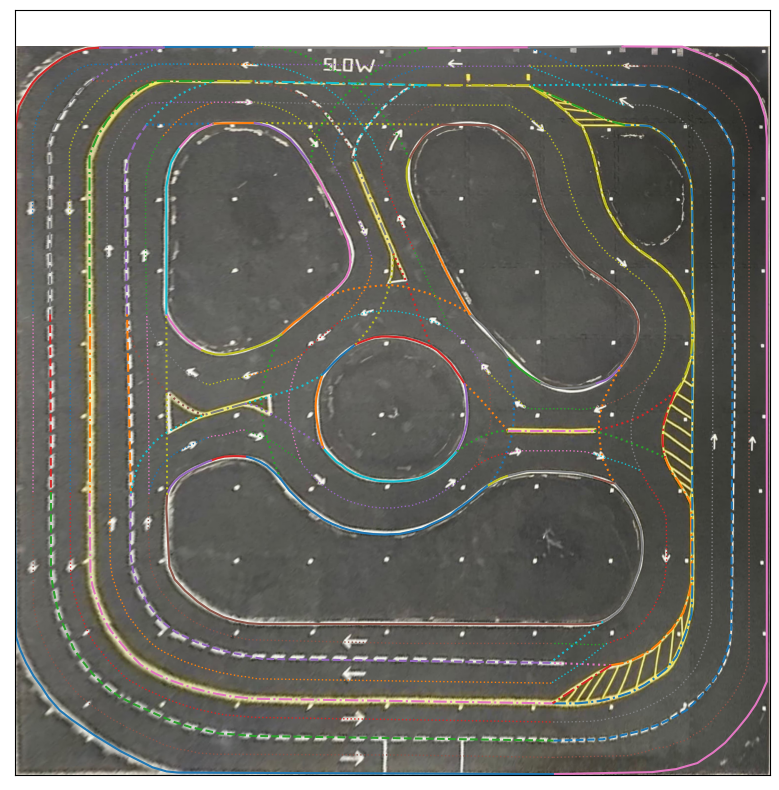

In [144]:
ui = UI("build_lanelet_map/IMG_0098.jpeg", 6.05, 6.05)
wrapper = LaneletWrapper("../../cfg/track.osm")
linestring_layer = wrapper.lanelet_map.lineStringLayer
for linestring in linestring_layer:
    ui.plot_linestring(linestring, update=False)

# loop through lanelets
lanelet_layer = wrapper.lanelet_map.laneletLayer
for lanelet in lanelet_layer:
    # ui.plot_lanelet(lanelet, update=False)
    ui.plot_linestring(lanelet.centerline, update=False)
ui.update_plot()

# create debug lanelet map
map_deub = wrapper.routing_graph.getDebugLaneletMap()
wrapper.save_lanelet_map(map_deub, "../../cfg/track_route.osm")


In [141]:
# Find which lanelet it belongs to
dis, lanelet = wrapper.find_lanelet_by_xy(2,1)
print(dis, lanelet.id)


0.0 1266


In [78]:
# Get reference speed
wrapper.get_lanelet_speed_limit(lanelet)

3.0

In [142]:
# Get a lanelet by id
lanelet = wrapper.lanelet_layer[1032]

# Get the length of the lanelet
L = wrapper.get_lanelet_length(lanelet)
centerline = lanelet.centerline
left_bound = lanelet.leftBound
for pt in centerline:
    print('c ', pt.x, pt.y)
    
for pt in left_bound:
    print('l ', pt.x, pt.y)
    
# Project a point to the centerline
print(wrapper.project_xy_to_linestring(0.2, 3, centerline))


c  0.144529434481631 3.8277530233448793
c  0.1476525027958363 3.089941744954076
c  0.144529434481631 2.348894510381355
l  0.28195111947611146 3.8277530233448815
l  0.28819725610452207 2.3521304665632754
(0.14727438891333391, 3.000222206733457)


In [155]:
l1 = wrapper.lanelet_layer[1203]
l2 = wrapper.lanelet_layer[1073]
dir(wrapper.routing_graph)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'adjacentLeft',
 'adjacentLefts',
 'adjacentRight',
 'adjacentRights',
 'besides',
 'checkValidity',
 'conflicting',
 'exportGraphML',
 'exportGraphViz',
 'following',
 'followingRelations',
 'forEachPredecessor',
 'forEachPredecessorIncludingAreas',
 'forEachSuccessor',
 'forEachSuccessorIncludingAreas',
 'getDebugLaneletMap',
 'getRoute',
 'getRouteVia',
 'left',
 'leftRelations',
 'lefts',
 'passableLaneletSubmap',
 'possiblePaths',
 'possiblePathsMinLen',
 'possiblePathsTowards',
 'possiblePathsTowardsMinLen',
 'previous',
 'previousRelations',
 'reachableSet',
 'reachableSetTowards',
 'right',
 'rightRelations',
 'ri